# CLASSIFICAION PROBLEM TO DETECT THE TYPE OF CANCER

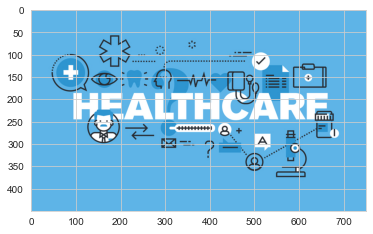

In [59]:
plt.imshow(mpimg.imread('shutterstock_400002673.jpg'))

# DATA SET DESCRIPTION


COLUMN DESCRIPTIONS: 


 Id: ID number 

 Diagnosis:   The diagnosis of breast tissues (M = malignant, B = benign) 

 radius_mean:   mean of distances from center to points on the perimeter 

 texture_mean:  standard deviation of gray-scale values 

 perimeter_mean:  mean size of the core tumor 

 area_mean: 

 smoothness_mean:  mean of local variation in radius lengths 

 compactness_mean: mean of perimeter^2 / area - 1.0 

 concavity_mean: mean of severity of concave portions of the contour 

 concave points_mean: mean for number of concave portions of the contour 

 symmetry_mean: 

 fractal_dimension_mean: mean for "coastline approximation" - 1 

 radius_se: standard error for the mean of distances from center to points on the perimeter 

 texture_se: standard error for standard deviation of gray-scale values 

 perimeter_se: 

 area_se: 

 smoothness_se: standard error for local variation in radius lengths 

 compactness_se: standard error for perimeter^2 / area - 1.0 

 concavity_se: standard error for severity of concave portions of the contour 

 concave points_se: standard error for number of concave portions of the contour 

 symmetry_se: 

 fractal_dimension_se: standard error for "coastline approximation" - 1 

 radius_worst"worst" or largest mean value for mean of distances from center to points on the perimeter 

 texture_worst: "worst" or largest mean value for standard deviation of gray-scale values 

 perimeter_worst: 

 area_worst: 

 smoothness_worst: "worst" or largest mean value for local variation in radius lengths 

 compactness_worst:  "worst" or largest mean value for perimeter^2 / area - 1.0 



 concavity_worst: "worst" or largest mean value for severity of concave portions of the contour 

 concave points_worst: "worst" or largest mean value for number of concave portions of the contour 

 symmetry_worst: 

 fractal_dimension_worst: "worst" or largest mean value for "coastline approximation" – 1 

# PROBLEM STATEMENT

# IMPORT LIBARIES

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_palette("hls")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

# DATA PREPROCESSING

In [3]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)

In [7]:
print('% Values in each categorical columns')
for i in ["diagnosis"]:
    print('\n% Values in column ',i)
    print((df[i].value_counts()/len(df[i])*100))

% Values in each categorical columns

% Values in column  diagnosis
B    62.741652
M    37.258348
Name: diagnosis, dtype: float64


<AxesSubplot:ylabel='diagnosis'>

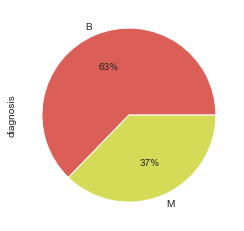

In [15]:
df["diagnosis"].value_counts().plot(kind="pie",autopct="%0.0f%%")

<AxesSubplot:>

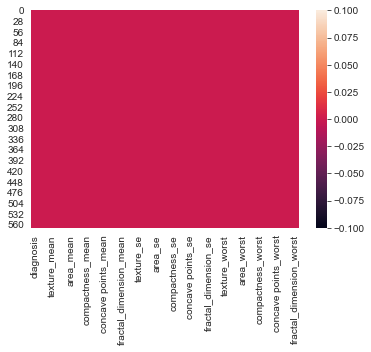

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

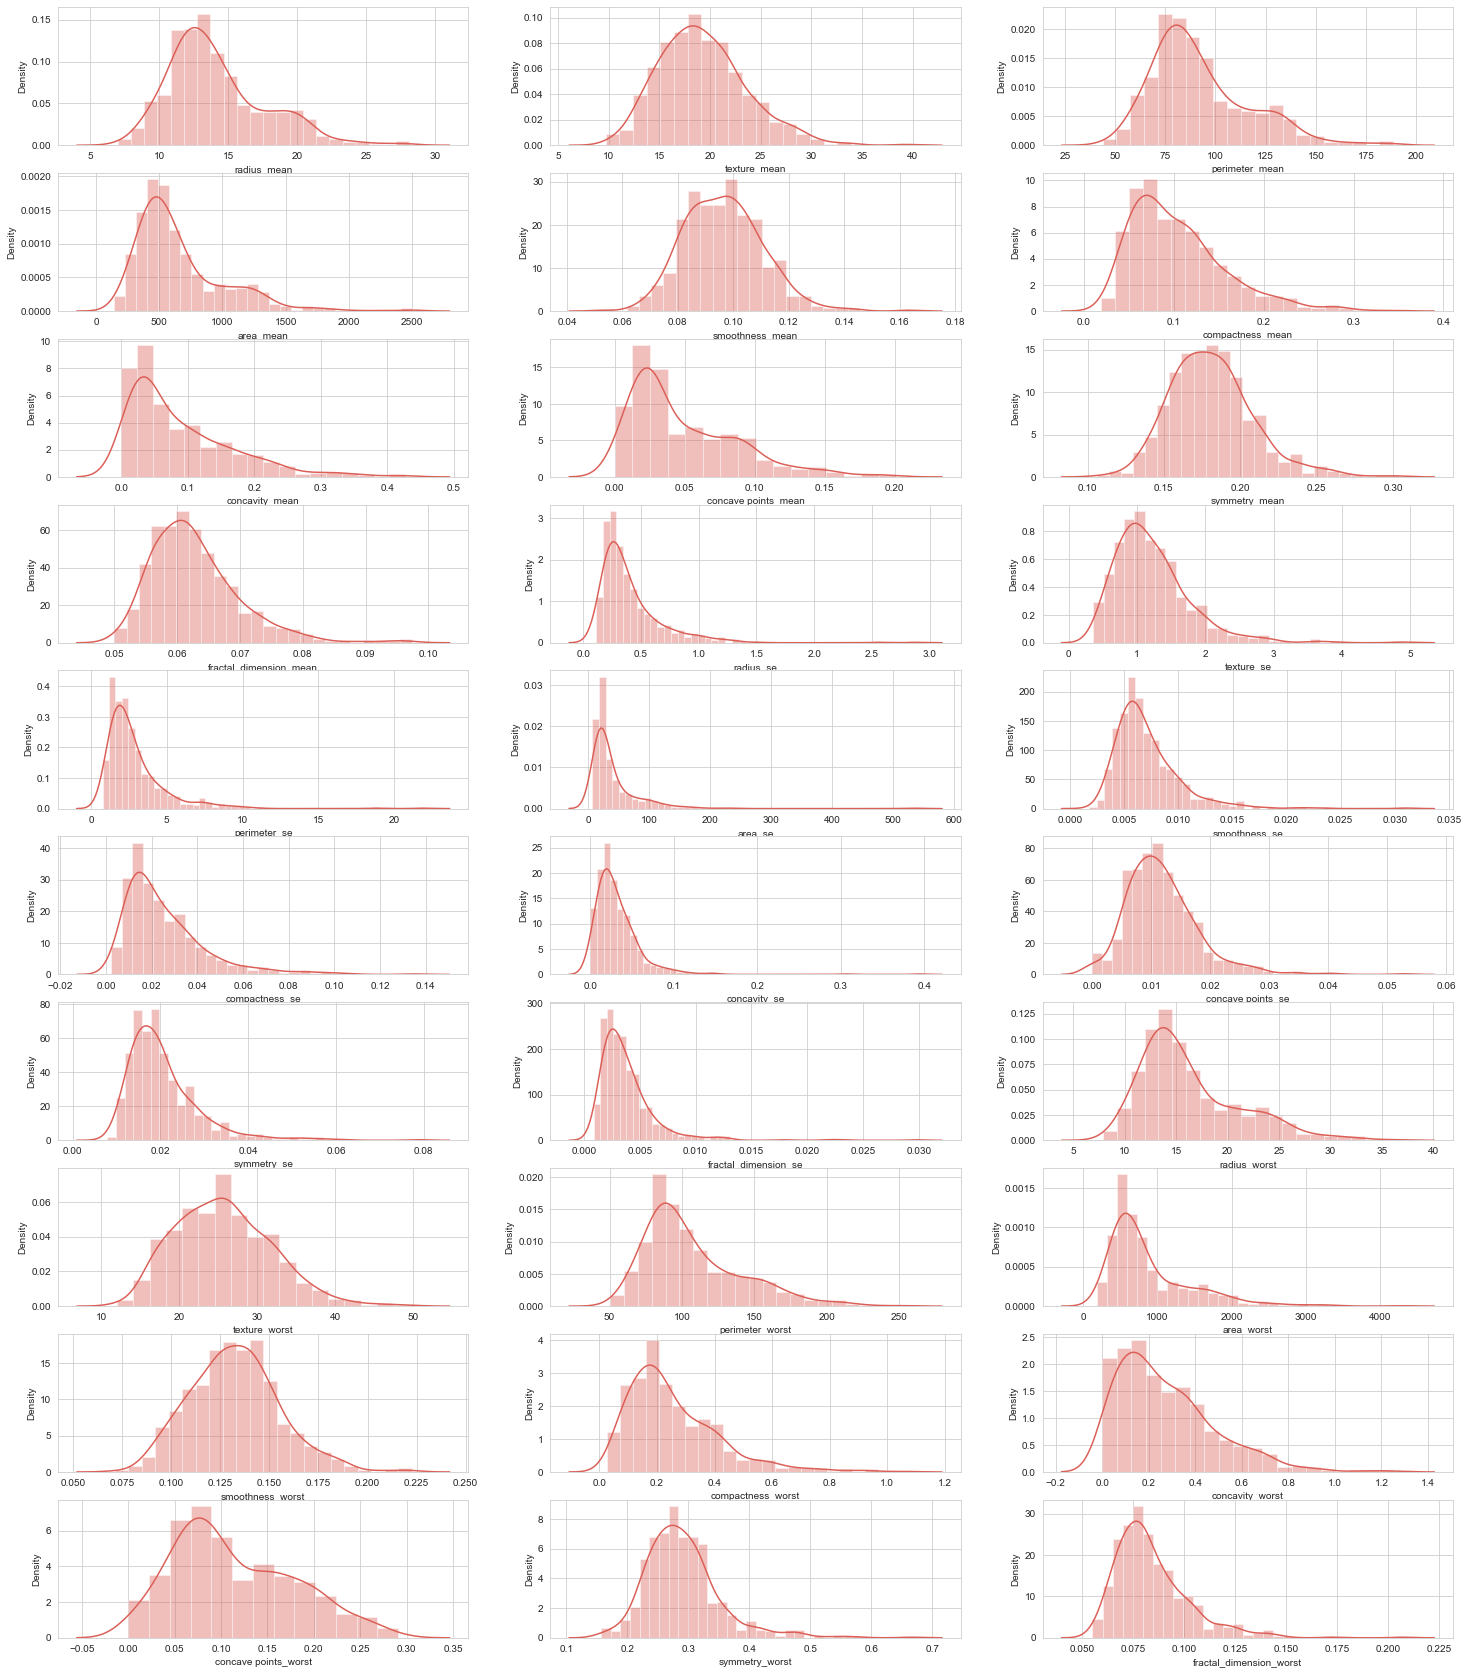

In [19]:
#Numerical Data
x = 10  # number of rows
y = 3  # number of columns
z = 1  # initialize plot counter

fig = plt.figure(figsize=(25, 30))

for i in df.select_dtypes(np.number).columns:
    plt.subplot(x, y, z)
    plt.xlabel(i)
    sns.distplot(df[i])
    z = z + 1

plt.show()

In [21]:
x =  df.drop(columns='diagnosis')
y = df['diagnosis']
y.replace({'M':0,'B':1},inplace=True)
ss = StandardScaler()
x_scaled = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x_scaled.shape

(569, 30)

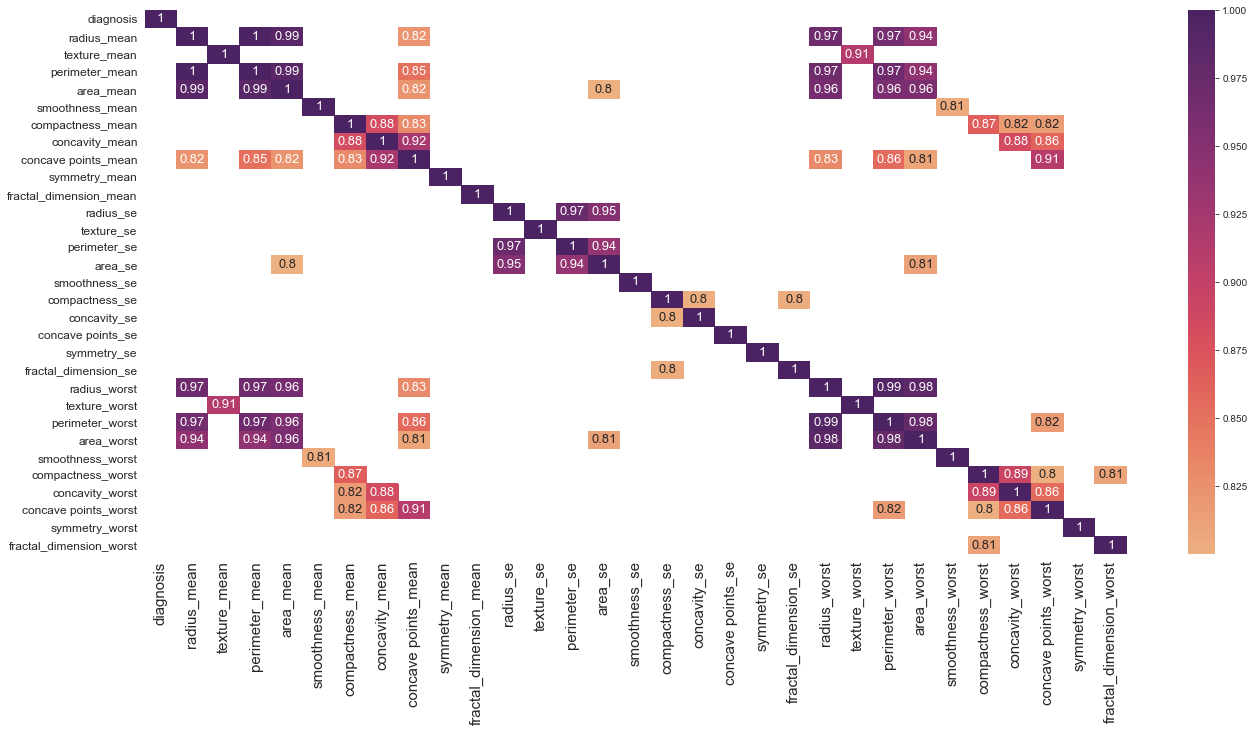

In [24]:
plt.figure(figsize = (22,10))
sns.heatmap(df.corr()[np.abs(df.corr()) > 0.8], annot = True, annot_kws = {"size": 13}, cmap = "flare")
plt.yticks(rotation = 'horizontal', fontsize = 12)
plt.xticks(fontsize = 15)
plt.show()

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.2,random_state=10,shuffle=True)

In [28]:
from scipy import stats
var = 0 
for i in  range(30):
    if stats.ttest_ind(x_train.iloc[:,i], x_test.iloc[:,i])[1] < .05:
    #ALl the columns have pvalue>0.05 , hence we accept the null hypothesis that the means of all the columns are equal
        var = var + 1
        print('There is a strong variation in ', x_train.columns[i])
if var == 0:
    print('XTest & XTrain have similar type of data')

There is a strong variation in  smoothness_mean


In [29]:
if stats.ttest_ind(y_train, y_test)[1] > .5:
    print('ytest & ytrain contain similar type of data')

In [33]:
smote = SMOTE(sampling_strategy=0.8)
x_sm,y_sm = smote.fit_resample(x,y)

In [35]:
x_trainsm,x_testsm,y_trainsm,y_testsm= train_test_split(x_sm,y_sm,test_size=0.2,random_state=10,shuffle=True)

# MODEL BUILDING

In [38]:
knn_default= KNeighborsClassifier()
knn_default.fit(x_train,y_train)
y_train_pred = knn_default.predict(x_train)
y_test_pred = knn_default.predict(x_test)

In [39]:
print('Train Classfication report:')
print(classification_report(y_train,y_train_pred))

Train Classfication report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       173
           1       0.97      1.00      0.98       282

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



In [40]:
print('Test Classfication report:')
print(classification_report(y_test,y_test_pred))

Test Classfication report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.99      1.00      0.99        75

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [43]:
y_train_pred_prob = knn_default.predict_proba(x_train)[:,1]
y_test_pred_prob = knn_default.predict_proba(x_test)[:,1]
print('Train ROC AUC:', roc_auc_score(y_train,y_train_pred_prob))
print('Test ROC AUC:', roc_auc_score(y_test,y_test_pred_prob))

Train ROC AUC: 0.9975505267904726
Test ROC AUC: 0.9998290598290598


In [46]:
params = {'n_neighbors':[1,2,3,4,5,6,7],
          'weights':['uniform','distance'],
          'p':[1,2,3,4]
         }
knn = KNeighborsClassifier()
grd_srch = GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring='f1_weighted',return_train_score=True)
grd_srch.fit(x_train,y_train)
grd_srch.best_params_



{'n_neighbors': 4, 'p': 2, 'weights': 'distance'}

In [47]:
gd_res = pd.DataFrame(grd_srch.cv_results_)
gd_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003193,0.003910,0.006401,0.003200,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.978022,0.977892,...,0.951405,0.024727,41,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.003208,0.003928,0.003194,0.003912,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.978022,0.977892,...,0.951405,0.024727,41,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.001606,0.003211,0.006387,0.003193,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.967117,0.956044,...,0.944729,0.015829,44,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.003199,0.003918,0.004784,0.003906,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.967117,0.956044,...,0.944729,0.015829,44,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.004800,0.003919,0.048732,0.008186,1,3,uniform,"{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}",0.945428,0.967117,...,0.940220,0.018311,51,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [48]:
knn_tunned= KNeighborsClassifier(n_neighbors=4,p=2,weights='distance')
knn_tunned.fit(x_train,y_train)
y_train_pred = knn_tunned.predict(x_train)
y_test_pred = knn_tunned.predict(x_test)
print('Train Classfication report:')
print(classification_report(y_train,y_train_pred))
print('Test Classfication report:')
print(classification_report(y_test,y_test_pred))

Train Classfication report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       282

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

Test Classfication report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.99      1.00      0.99        75

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [49]:
y_train_pred_prob = knn_tunned.predict_proba(x_train)[:,1]
y_test_pred_prob = knn_tunned.predict_proba(x_test)[:,1]

print('Train ROC AUC:', roc_auc_score(y_train,y_train_pred_prob))
print('Test ROC AUC:', roc_auc_score(y_test,y_test_pred_prob))

Train ROC AUC: 1.0
Test ROC AUC: 1.0


The tunned knn is optimal model without underfit and overfit.

In [50]:
knn_default= KNeighborsClassifier()
knn_default.fit(x_trainsm,y_trainsm)
y_train_pred = knn_default.predict(x_trainsm)
y_test_pred = knn_default.predict(x_testsm)

In [51]:
print('Train Classfication report:')
print(classification_report(y_trainsm,y_train_pred))
print('Test Classfication report:')
print(classification_report(y_testsm,y_test_pred))

Train Classfication report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       226
           1       0.94      0.97      0.96       287

    accuracy                           0.95       513
   macro avg       0.95      0.95      0.95       513
weighted avg       0.95      0.95      0.95       513

Test Classfication report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        59
           1       0.97      0.96      0.96        70

    accuracy                           0.96       129
   macro avg       0.96      0.96      0.96       129
weighted avg       0.96      0.96      0.96       129



# Result